<a href="https://colab.research.google.com/github/mk7890/Machine-Learning-II/blob/main/ML2_GMM(Gaussian_Mixture_Models)_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gaussian Mixture Models (GMM)
Gaussian Mixture Models (GMM) are probabilistic models used for clustering and density estimation. GMM assumes that the data is generated from a mixture of several Gaussian distributions with unknown parameters. Each Gaussian component is defined by:

- A mean vector (
𝜇
μ) that defines its center.
- A covariance matrix (
Σ
Σ) that defines its shape.
- A weight (
𝜋
π) that defines the proportion of data points belonging to this Gaussian component.

**Applications of GMM:**

- Clustering: To group data points into clusters.
- Density Estimation: To model the underlying distribution of the data.
- Anomaly Detection: By determining how well a data point fits the model.

**Key Features:**

- Soft Clustering: Unlike K-means, GMM assigns probabilities to each data point belonging to a cluster.
- Elliptical Clusters: GMM can model clusters of arbitrary shapes, unlike K-means which assumes spherical clusters.
- Expectation-Maximization (EM): GMM uses the EM algorithm to optimize the parameters iteratively.

**When to Use GMM**

- When clusters are not spherical and have varying sizes or density.
- When you want soft assignments (probabilities) instead of hard clustering.
- For datasets with overlapping clusters. and you want to account for the degree of overlap.
- Anomaly detection tasks or when modeling the data distribution is required

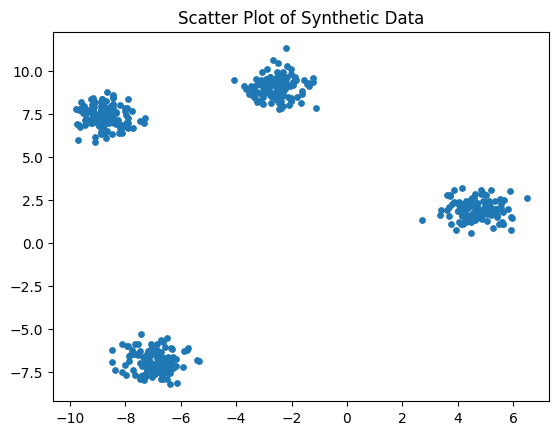

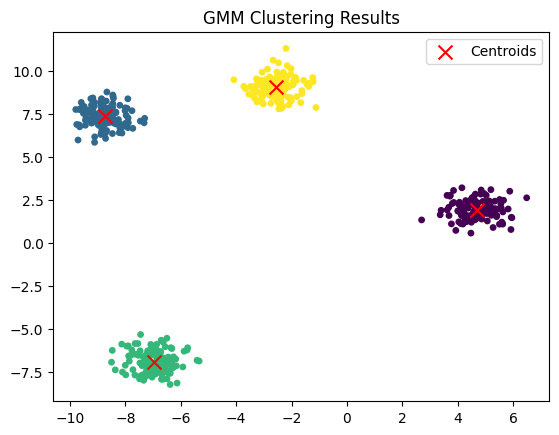

GMM Means (Cluster Centers):
[[ 4.68904627  1.94358124]
 [-8.74425361  7.40268042]
 [-6.95242982 -6.89471836]
 [-2.5650083   9.06117548]]

Covariance Matrices:
[[[ 0.40368043 -0.00375357]
  [-0.00375357  0.29862513]]

 [[ 0.26866356 -0.022436  ]
  [-0.022436    0.36196565]]

 [[ 0.34491028 -0.02949558]
  [-0.02949558  0.36961619]]

 [[ 0.31199434  0.01668186]
  [ 0.01668186  0.37335662]]]

First 5 Data Points Probabilities:
[[4.79728403e-106 1.00000000e+000 3.32916521e-112 4.47184527e-024]
 [2.27683004e-151 2.00418222e-122 1.00000000e+000 1.33862790e-166]
 [1.00000000e+000 1.57043481e-187 7.75069856e-158 8.41857133e-088]
 [3.23484531e-057 3.44125882e-030 1.68094419e-151 1.00000000e+000]
 [9.47482710e-125 3.56035353e-129 1.00000000e+000 2.02001613e-158]]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate a synthetic dataset
X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

# Scatter plot of the data
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.title("Scatter Plot of Synthetic Data")
plt.show()

# Fit GMM to the data
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(X)

# Predict the cluster for each data point
labels = gmm.predict(X)

# Scatter plot with GMM cluster labels
plt.scatter(X[:, 0], X[:, 1], c=labels, s=15, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title("GMM Clustering Results")
plt.legend()
plt.show()

# Additional information
print("GMM Means (Cluster Centers):")
print(gmm.means_)

print("\nCovariance Matrices:")
print(gmm.covariances_)

# Probability of each sample belonging to each cluster
proba = gmm.predict_proba(X)
print("\nFirst 5 Data Points Probabilities:")
print(proba[:5])
